# Lab 3 – First Neural Network
- Work on saved a copy on your Drive, name your file appropriately, e.g. `GN-lab03.ipynb` (Korean students, please put the initial of your **family name first** because that's how you appear in the register, e.g. Kim Ji Hwan should be `KJH`)
- Run ALL the code cells and answer the questions (code or text) before submitting the notebook. Code cell output should be visible in your submission.
- Save your notebook (`Ctrl+S`) before downloading and submitting on iCampus. ONLY ipynb files or URL links will be accepted.

## A. Implementing a basic "forward" pass
Try to visualise what each neural network model looks like in terms of neurons, weights and biases.


In [1]:
import sys
import matplotlib as plt
import numpy as np
import torch

## The Perceptron (Single Neuron)
- Every non-input NEURON has a bias, not every weight, so the bias is added for a single output neuron
- 1 output neuron with 3 inputs

In [ ]:
# Initialise some values
input = [0.8, 1.3, 2.5]
weights = [2.5, 1.7, -0.5]
bias = 2

# Get the weigthed sum of the inputs and add the bias
output = input[0]*weights[0] + input[1]*weights[1] + input[2]*weights[2] + bias
print(output)

# Add a step function; output is 1 if it is 0 or more, 0 otherwise
output = 1 if output >= 0 else 0

# Print perceptron's final output
print(f'Final perceptron output = {output}') 

# TODO
# Q1. Think of a ML problem or task where a neural network would have a final output to be 0 or 1.
# Binary classification problem. For example, a nueral network model can be used to predict whether an email is spam or not spam. 
# The input to model would be the email content, and output would be 0 (Not spam) or 1 (spam).


4.96
Final perceptron output = 1


### Example 2: Multiple neurons
- Each neuron will have its own WEIGHT associated to each input
- As before, each NEURON will have its own BIAS

In [ ]:
#inputs = [0.8, 1.3, 2.5, 2.0] # A sample of 4 features, e.g. temperature, humidity, wind, pressure

input = [0.8, 1.3, 2.5, 2.0]

weights1 = [2.5, 1.7, -0.5, 1.0]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2
bias2 = 3
bias3 = 0.5

output = [input[0]*weights1[0] + input[1]*weights1[1] + input[2]*weights1[2] + input[3]*weights1[3] + bias1,
          input[0]*weights2[0] + input[1]*weights2[1] + input[2]*weights2[2] + input[3]*weights2[3] + bias2,
          input[0]*weights3[0] + input[1]*weights3[1] + input[2]*weights3[2] + input[3]*weights3[3] + bias3]

print(output)

# TODO
# Q2. How many output neurons does this network contain?
# 3

[6.96, 1.867, 2.106]


### Use Loops and Matrices!




In [ ]:
inputs = [0.8, 1.3, 2.5, 2.0]

weights = [[2.5, 1.7, -0.5, 1.0], 
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

layer_outputs = [] # Outputs of current layer
for weight, bias in zip(weights, biases):
    output = 0 # Reset current neuron output to 0
    for input, w in zip(inputs, weight):
        output += input*w
    output += bias
    layer_outputs.append(output)

print(zip(weights, biases))
print(layer_outputs)


[6.96, 1.867, 2.106]


## Let's use NumPy & Dot Products!
- Multiply elements wise the corresponding values in two arrays and add them up
- Dot product between two vectors results in a single scalar value


In [ ]:
import numpy as np

inputs = np.array([0.8, 1.3, 2.5, 2.0])
weights = np.array([2.5, 1.7, -0.5, 1.0])
bias = 2

output = np.dot(weights, inputs) + bias
print(output)

6.96


When performing a dot product between a vector (input) and a matrix (weights)
  - Weights have to be first parameter of ``np.dot()``, otherwise an error will be thrown
  - Column size of ``weights`` = row size of ``inputs``


In [ ]:
inputs = np.array([0.8, 1.3, 2.5, 2.0])

weights = np.array([[2.5, 1.7, -0.5, 1.0], 
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]])

biases = np.array([2, 3, 0.5])

output = np.dot(weights, inputs) + biases # dot product of a vector and a matrix

print(output)

# TODO
# Q3. What else can we do to perform the dot product between the inputs and weights?
# We can use torch.dot() for vectors. 
# In case of 2-D tensor, we can use torch.mm(), torch.matmul(), or just @ operator.

[6.96  1.867 2.106]


## Summary
- Weights and biases are two different tools for approximating something (e.g. an output from an input)
- Weights determine how much influence this input has for the output (as it is multiplied) and bias determines how much this output can be offset by the input (as it is added)
- Think of a classical equation for a line ``y = wx + b`` where ``w`` is the weight and ``b`` is a the bias

## Dot product between two 2-D arrays (two matrices)
- Numpy's ``np.dot()`` is flexible; it computes the inner product for 1D arrays and performs matrix multiplication for 2D arrays.
- Since both matrices have the same size, transpose the second matrix, i.e. ``weights`` here so that ``1st-col-size=2nd-row-size`` holds 


In [ ]:
# inputs 3x4
inputs = np.array([[0.8, 1.3, 2.5, 2.0],
          [2.3, 1.5, 3.8, 4.5],
          [-1.5, 2.7, 3.3, -0.8]])

# weights 3x4
weights = np.array([[2.5, 1.7, -0.5, 1.0], 
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]])

biases = np.array([2, 3, 0.5])

output = np.dot(inputs, weights.T) + biases

print(f'{output} \n{output.shape}')

# TODO
# Q4. Explain what it means to have a 2-D array for the input and also for the output
# Having 2-D array for the input means input that is organized as matrix, where each row represents observation (obs) and columns represents features or variables.
# Having 2-D array for the output means prediction, or classification results corresponding to the input observation in the same row. 


[[ 6.96   1.867  2.106]
 [12.9    1.523  4.058]
 [ 0.39   1.051  0.026]] 
(3, 3)


## Let's use Tensors!
- ``torch.dot()`` behaves differently to ``np.dot()`` 
- ``torch.dot(a,b)`` treats both ``a`` and ``b`` as 1D vectors (irrespective of their original shape) and computes their inner product.
- Several ways to do matrix (rank 2 tensor) multiplication:
  - ``ab = a.mm(b)``
  - ``ab = torch.mm(a, b)``
  - ``ab = torch.matmul(a, b)``
  - ``ab = a @ b # Python 3.5+``
- The number of columns of the first matrix must be equal to the number of rows of the second matrix.
- The function ``torch.matmul()`` performs matrix multiplications if both arguments are 2D and computes their dot product if both arguments are 1D.


In [ ]:
# 1-D tensor dot product
a = torch.tensor([1, 2])
b = torch.tensor([3, 2])

torch.dot(a, b)

tensor(7)

In [ ]:
# 2-D tensor dot product for matrices with matching column and row size
a = torch.tensor([
    [0, 1, 2],
    [1, 2, 3]
])

b = torch.tensor([
    [0, 1],
    [1, 1],
    [1, 3]
])

torch.mm(a,b)


tensor([[ 3,  7],
        [ 5, 12]])

### Dot product between two 2-D tensors from the example

In [ ]:
input = torch.tensor(inputs)
weight = torch.tensor(weights)
bias = torch.tensor(biases)

output = torch.matmul(input, torch.transpose(weight, 0, 1)) + bias
print(output, output.shape)

# TODO
# Q5. repeat using the @ operator. You should get the same output
weight_t = torch.transpose(weight, 0, 1)
output = input@weight_t + bias
print(output, output.shape)

tensor([[ 6.9600,  1.8670,  2.1060],
        [12.9000,  1.5230,  4.0580],
        [ 0.3900,  1.0510,  0.0260]], dtype=torch.float64) torch.Size([3, 3])
tensor([[ 6.9600,  1.8670,  2.1060],
        [12.9000,  1.5230,  4.0580],
        [ 0.3900,  1.0510,  0.0260]], dtype=torch.float64) torch.Size([3, 3])


### Exercise: Write your own code using TENSORS to implement a neural network as follows:
- Has 5 input neurons made up of random numbers between 0 and 1
- Connects to two output neurons
- Weights and biases should be random numbers between a normal distribution. Use `torch.randn()`
- The final outputs should be a combination of the weighted sum followed by an activation function as follows:
  - If the weighted sum is negative, then the output is 0
  - Otherwise the output is just the weighted sum


In [ ]:
# Q6. Has 5 input neurons made up of random numbers between 0 and 1. Use torch.rand()
input = torch.rand(5)
# Q7. Weights should be random numbers between a normal distribution. Use torch.randn()
weight = torch.randn(2,5)
# Q8. Biases should be random numbers between a normal distribution. Use torch.randn()
bias = torch.randn(2)
# Q9. The outputs should be a combination of the weighted sum of the inputs followed by an activation given below in 10.
output = torch.matmul(input, torch.transpose(weight, 0, 1)) + bias # weighted sum
# Q10. If the weighted sum is negative, then the output is 0, otherwise the output is just the weighted sum
output[output < 0 ] = 0 
# Print out the final output values
print(output)

tensor([0.0000, 2.1563])


## B. Build NN Model using ``torch.nn.Module``
- Create a subclass of nn.Module
- Define layers and activations
- Do a forward pass to inspect the model, parameters and outputs
- Add loss, optimiser and training loop for linear regression

In [3]:
import torch

import torch.nn as nn

class TinyModel(nn.Module): # TinyModel is a subclass of nn.Module
    
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(100, 200) # input_size and hidden_size
        self.activation = nn.ReLU() # Rectified Linear Unit activation function
        self.linear2 = nn.Linear(200, 10) # hidden layer and output layer size
        self.softmax = nn.Softmax() # output layer activation function
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.activation(out)
        out = self.linear2(out)
        out = self.softmax(out)
        return out

# Create an instance of TinyModel (like initalising a variable)
tinymodel = TinyModel()

# See what this model contains
print('The model:')
print(tinymodel)

# Print out one of the layers
print('\n\nJust one layer:')
print(tinymodel.linear2)

# View ALL the parameters (weights and biases)
# print('\n\nModel params:')
# for param in tinymodel.parameters():
#     print(param)

# View the parameters (weights and biases) in the LAST layer (linear2) only
print('\n\nLinear2 layer params:')
for param in tinymodel.linear2.parameters():
    print(param)

The model:
TinyModel(
  (linear1): Linear(in_features=100, out_features=200, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=200, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)


Just one layer:
Linear(in_features=200, out_features=10, bias=True)


Linear2 layer params:
Parameter containing:
tensor([[ 0.0060, -0.0167, -0.0039,  ...,  0.0609, -0.0697, -0.0662],
        [ 0.0661, -0.0065, -0.0313,  ...,  0.0577, -0.0564,  0.0098],
        [-0.0565, -0.0178,  0.0706,  ...,  0.0052, -0.0198, -0.0681],
        ...,
        [ 0.0008, -0.0440, -0.0124,  ..., -0.0407,  0.0093,  0.0448],
        [ 0.0618, -0.0539, -0.0387,  ..., -0.0671,  0.0552, -0.0505],
        [-0.0282, -0.0666, -0.0383,  ...,  0.0661,  0.0666, -0.0680]],
       requires_grad=True)
Parameter containing:
tensor([-0.0584,  0.0667, -0.0058, -0.0531,  0.0175,  0.0459,  0.0560, -0.0496,
        -0.0064,  0.0581], requires_grad=True)


### Linear layer demo

For the code chunk below, note that:
- the weight, bias and output tensor dimensions are as expected (weight matrix is in transposed form, i.e. has shape (out_features, in_features)
- the multiplication of the inputs with the weight matrices, added with the bias will produce the output

In [ ]:
# Create a linear layer with 3 inputs and 2 outputs
lin = torch.nn.Linear(3, 2)
# Create sample input vector with random values
x = torch.rand(1, 3)
print('Input:')
print(x)

# Print the initial parameter values (these are also randomly set)
print('\n\nWeight and Bias parameters:')
for param in lin.parameters():
    print(param)

# Apply the linear layer to the input
y = lin(x)
print('\n\nOutput:')
print(y)


Input:
tensor([[0.1238, 0.8692, 0.6769]])


Weight and Bias parameters:
Parameter containing:
tensor([[ 0.1187, -0.0480, -0.0962],
        [ 0.0486, -0.2089,  0.1816]], requires_grad=True)
Parameter containing:
tensor([0.2361, 0.3950], requires_grad=True)


Output:
tensor([[0.1439, 0.3423]], grad_fn=<AddmmBackward0>)


- Note that you see ``requires_grad`` for the parameters. This means that their values will be tracked and used for **gradient** calculation during the training phase.
- Although ``Parameter`` is a subclass of ``Tensor``, it has a special extended behaviour in that its gradients can be tracked for NN learning purposes.


### Add Training Loop, Loss and Optimiser
- A loop is necessary to allow NN training to happen iteratively.
- The number of times we want to repeat the cycle is called number of epochs.
- Loss functions tell us how far a model's prediction is from the correct answer. PyTorch contains a variety of loss functions, including common MSE (mean squared error = L2 norm), Cross Entropy Loss and Negative Likelihood Loss (useful for classifiers), and others.
- An optimiser helps to minimise the loss by taking iterative steps in the direction that minimises the loss by updating the parameters in each epoch. We will use Stochastic Gradient Descent (SGD) for this example.


## Example: Linear Regression
1. Provide training data. We will provide the inputs, ``x`` and outputs, ``y`` for the formula ``y = 3x + 2``. 
  - Remember to provide them as tensors. 
  - Note that ``y`` will have to be correct values that satisfy the formula.
2. Define the NN class. 
  - Since we will only take in a number and also spit out a number, we will have the ``input_size`` to be 1 and the ``output_size`` to be 1 as well. 
  - For linear regression, the output will be a real value, so no output layer activation function is needed.
  - Note also that an extra parameter ``hidden_size`` was added to the initialiser
3. Create an instance of the NN class
  - Pass in the required parameter ``hidden_size``
4. Define Loss and Optimiser
  - for this linear regression problem, we will use the MSE Loss and SGD optimiser
5. Training Loop
  - Loop through a set number of times, e.g. 100
    - forward pass to calculate the predicted values for each input sample and calculate the loss using the loss instance you created earlier
    - backward pass to first reset all the gradients ``opt.zero_grad()``, then to calculate the gradients of the loss w.r.t. the params ``loss.backward()`` and finally update the params accordingly ``opt.step()``

6. Test the model
  - At this point, the model has been trained, i.e. the parameters have been optimised and the loss should be small enough.
  - Call ``model()`` with any new number to test what the trained model will predict. See how accurately it performs.
  - Test with several other numbers.

### NOTES:
- Data will need to be prepared so that it can be used with PyTorch. Here we have specified the data as a tensor and also made sure that it is of type float. 
- It is good practice to specify hyper parameters separately, e.g. ``hidden_size``, ``learning_rate``, ``num_epochs``, etc.


In [22]:
import torch

import torch.nn as nn


# 1. Define training data for a simple mathematical formula y = 3x + 2 for x=1, ..., 5
x = torch.tensor([[1],[2],[3],[4],[5]], dtype=torch.float32)
y = torch.tensor([[5],[8],[11],[14],[17]], dtype=torch.float32)

# 2. Define NN class 
class MyNN(nn.Module): # TinyModel is a subclass of nn.Module
    
    def __init__(self, hidden_size):
        super().__init__()
        self.linear1 = nn.Linear(1, hidden_size) # input_size and hidden_size
        self.activation = nn.ReLU() # Rectified Linear Unit activation function
        self.linear2 = nn.Linear(hidden_size, 1) # hidden layer and output layer size
        # output layer is a real value for regression, does not need any activation
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        return x

# 3. Create an instance of NN model and define the hidden_size
hidden_size = 4
model = MyNN(hidden_size) # now 'model' will be a callable function

# 4. Loss and Optimiser
learning_rate = 0.01
loss_fn = nn.MSELoss() # now 'loss_fn' will be a callable function
opt = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 5. Training loop
num_epochs = 100

for epoch in range(num_epochs):
  # 5.1 Forward pass
  y_pred = model(x)
  loss = loss_fn(y_pred, y) 

  # 5.2 Backward pass
  opt.zero_grad() # Reset gradients at each epoch
  loss.backward() # Backpropagate the loss gradients w.r.t the params
  opt.step() # Update params

  # 5.3 Print loss every 10th epoch
  if (epoch+1) % 10 == 0:
    print(f'Epoch {epoch+1}/{num_epochs}, Loss={loss.item():.4f} ')


Epoch 10/100, Loss=0.1653 
Epoch 20/100, Loss=0.1217 
Epoch 30/100, Loss=0.0911 
Epoch 40/100, Loss=0.0684 
Epoch 50/100, Loss=0.0516 
Epoch 60/100, Loss=0.0390 
Epoch 70/100, Loss=0.0295 
Epoch 80/100, Loss=0.0223 
Epoch 90/100, Loss=0.0170 
Epoch 100/100, Loss=0.0129 


In [ ]:
# 6. Prediction
# Test the model on any new x
test_num = 10
test = torch.tensor([test_num], dtype=torch.float32)

# Get the model's prediction for this test number
print(f'\n\nModel prediction for {test_num} is {model(test).item():.4f}')



Model prediction for 10 is 31.8430


In [90]:
# TODO
# Q11. Did the loss decrease over time during training?
# Yes

# Q12. Was the prediction of the model for x=10 close to the ideal value that it should have?
# Yes, ideal number was 32, and model prediction for 10 was 31.8430. 
# error = 0.1570

# Q13. Change the num_epochs to 200 and retrain the model. Is the prediction for x=10 better? Why?
# Retraining Model
num_epochs = 200
hidden_size = 4
model = MyNN(hidden_size)
learning_rate = 0.01
loss_fn = nn.MSELoss() 
opt = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):

  y_pred = model(x)
  loss = loss_fn(y_pred, y) 
  opt.zero_grad() 
  loss.backward() 
  opt.step() 

  if (epoch+1) % 20 == 0:
    print(f'Epoch {epoch+1}/{num_epochs}, Loss={loss.item():.4f} ')


test_num = 10
test = torch.tensor([test_num], dtype=torch.float32)
error = abs(round((test_num*3+2 - model(test).item()),4))
print(f'\nModel prediction for {test_num} is {model(test).item():.4f}, 200 epochs, 4 hidden layer\nerror = {error}\n')

# As error = 0.0773, The prediction for x=10 is better than the previous model. 
# As the process of repeating learning increases, optimization seems to have worked better.

# Q14. Set num_epoch=100 and change the hidden_size to 8. Retrain the model. Is the model's performance better?
num_epochs = 100
hidden_size = 8
model = MyNN(hidden_size)
learning_rate = 0.01
loss_fn = nn.MSELoss() 
opt = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
  y_pred = model(x)
  loss = loss_fn(y_pred, y) 
  opt.zero_grad() 
  loss.backward() 
  opt.step() 

  if (epoch+1) % 10 == 0:
    print(f'Epoch {epoch+1}/{num_epochs}, Loss={loss.item():.4f}')

test_num = 10
test = torch.tensor([test_num], dtype=torch.float32)
error = abs(round((test_num*3+2 - model(test).item()),4))
print(f'\nModel prediction for {test_num} is {model(test).item():.4f}, 100 epochs, 8 hidden layer\nerror = {error}\n')

# As error = 0.3221, it cannot be said that prediction result is better.

Epoch 20/200, Loss=0.0005 
Epoch 40/200, Loss=0.0002 
Epoch 60/200, Loss=0.0001 
Epoch 80/200, Loss=0.0001 
Epoch 100/200, Loss=0.0000 
Epoch 120/200, Loss=0.0000 
Epoch 140/200, Loss=0.0000 
Epoch 160/200, Loss=0.0000 
Epoch 180/200, Loss=0.0000 
Epoch 200/200, Loss=0.0000 

Model prediction for 10 is 32.0773, 200 epochs, 4 hidden layer
error = 0.0773

Epoch 10/100, Loss=0.2377
Epoch 20/100, Loss=0.1583
Epoch 30/100, Loss=0.1056
Epoch 40/100, Loss=0.0706
Epoch 50/100, Loss=0.0472
Epoch 60/100, Loss=0.0315
Epoch 70/100, Loss=0.0210
Epoch 80/100, Loss=0.0141
Epoch 90/100, Loss=0.0094
Epoch 100/100, Loss=0.0063

Model prediction for 10 is 32.3221, 100 epochs, 8 hidden layer
error = 0.3221



In [81]:
# Q15. Try increasing or decreasing num_epoch and/or hidden_size to see which combination gives you the best model. 
# Keep the output of your code execution above for the best combination and state which combination of num_epoch 
# and hidden_size values gave you the best model.
from itertools import permutations 

x = torch.tensor([[1],[2],[3],[4],[5]], dtype=torch.float32)
y = torch.tensor([[5],[8],[11],[14],[17]], dtype=torch.float32)
test_num = 10

def MyNN_func(num_epochs, hidden_size):
    model = MyNN(hidden_size)
    learning_rate = 0.01
    loss_fn = nn.MSELoss() 
    opt = torch.optim.SGD(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        y_pred = model(x)
        loss = loss_fn(y_pred, y) 
        opt.zero_grad() 
        loss.backward() 
        opt.step() 

    test = torch.tensor([test_num], dtype=torch.float32)
    error = abs(round(test_num*3+2 - model(test).item(),4))
    return error 


num_epochs = [100, 200, 300, 400, 500, 600]
hidden_sizes = [2,4,6,8, 10]
temp = np.array([[0,0,0]], dtype=np.float64)
for epoch in num_epochs :
    for size in hidden_sizes :
        row_add = [[epoch, size, MyNN_func(epoch, size)]]
        temp = np.r_[temp, row_add]

results = np.delete(temp, 0, axis = 0)
best = results[results[:,2].argmin(), :]

# results, model withs smallest test error
print(f'<Model prediction for 10>\n\nBest epoch size : {best[0]}\nBest hidden size : {best[1]}\nwith error : {best[2]}')


<Model prediction for 10>

Best epoch size : 500.0
Best hidden size : 6.0
with error : 0.0004


### Let's plot the landscape of the MSE loss over a range of values for weight
- The sample training data has function ``y=3x+2``. However, this relationship is **NOT** known by the model. We only have ``x``'s and ``y``'s.
- So we try different values of weight, ``w``, between -1 and 5 to fit the equation ``y = wx + 2``
- When we do that, we calculate the MSE loss between the predicted outcome, ``pred`` and the actual outcome, ``y`` for each ``w`` that we use.
- The loss that occurred for each weight is plotted and connected.

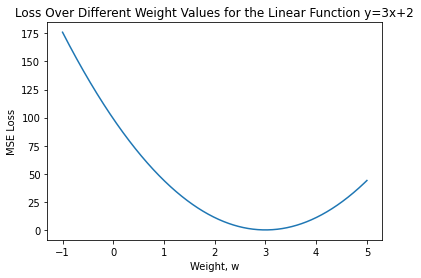

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Create a range of values from -1 to 5
w_range = np.linspace(-1, 5, 1000)
loss_w_range = [] # create an empty list to store the loss values

# Try different weight values to get predictions for y
for w in w_range:
    pred = (w * x) + 2
    loss = torch.mean((pred - y) ** 2)
    loss_w_range.append(loss.item())

# Plot the graph
plt.title("Loss Over Different Weight Values for the Linear Function y=3x+2")
plt.plot(w_range, loss_w_range)
plt.xlabel('Weight, w')
plt.ylabel('MSE Loss')
plt.show()


In [83]:
# Q16. From the graph, what value of weight gives the minimum loss for this linear function?
min_loss_w = w_range[loss_w_range.index(min(loss_w_range))]
print(f'The weight gives minimum loss for this linear function : {min_loss_w}')

# 3.0, which is same value with given linear function 3x+2.

The weight gives minimum loss for this linear function : 3.0
